# Статистика, DS-поток
## Практическое задание 10


**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds22_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.
**Баллы за задание:**

* Задача 1 &mdash; 50 баллов;
* Задача 2 &mdash; 50 балла;
* Задача 3 &mdash; 10 балла;
* Задача 4 &mdash; 10 баллов;
* Задача 5 &mdash; 60 балла;
* Задача 6 &mdash; 60 балла.

**Важность задач:**

* *высокая:* задачи 1-3, 6;
* *средняя:* задача 4. 5.

In [183]:
import numpy as np
import pandas as pd
import scipy.stats as sps
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, palette='Set2')

%matplotlib inline

from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric.kde import kernel_switch
from sklearn.preprocessing import LabelEncoder
from category_encoders import TargetEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

---

## Ядерные оценки

### Задача 1.

В этой задаче вы исследуете различные непараметрические оценки распределений.
Для этого вам выдается почти готовый код функций `draw_ecdf`, `draw_hist` и `draw_pdf`, которые используются для построения ЭФР, гистограммы и ядерной оценки плотности соответственно. В реализациях этих функция часть кода пропущена, вам нужно его дописать. Код предполагает использование реализации ядерных оценок плотности из `statsmodels`.
При желании вы можете написать аналогичный код, используя реализацию в `seaborn`.

In [26]:
def draw_ecdf(sample, grid, cdf=None):
    """
    По сетке cтроит графики эмпирической функции распределения 
    и истинной (если она задана) для всей выборки и для 1/10 ее части.
    
    Вход:
        sample: выборка
        grid: сетка
        cdf: истинная функция распределения из scipy.stats
    """
    
    plt.figure(figsize=(16, 3))
    # Выбирается размер выборки
    for i, size in enumerate([len(sample) // 10, len(sample)]):
        plt.subplot(1, 2, i + 1)
        
        # Отрисовываются точки выборки на графике    
        plt.scatter(
            sample[:size],
            np.zeros(size),
            #<первые size точек из sample с нулевой y-координатой>,
            alpha=0.4, label='sample'
        )
        
        # Если передана истинная функция распределения, 
        # отрисовывается ее график
        if cdf is not None:
            plt.plot(
                grid,
                cdf(grid),
                #<значения функции распределения в точках grid>,
                color='green', alpha=0.3, lw=2, label='true cdf'
            )
        
        # Отрисовывается эмпирическую функцию распределения
        ecdf = ECDF(sample[:size])
        plt.plot(
            grid,
            ecdf(grid),
            #<значения эмпирической функции распределения 
             #(по первым size точек из sample) в точках grid>,
            color='red', label='ecdf'
        )
        
        plt.legend()
        plt.grid(ls=':')
        plt.title('sample size = {}'.format(size))
    plt.show()

In [59]:
def draw_hist(sample, grid, pdf=None):
    """
    Строит гистограмму и, по сетке, график истинной плотности 
    (если она задана) для всей выборки и для 1/10 ее части.
    
    Вход:
        sample: выборка
        grid: сетка
        pdf: истинная плотность из scipy.stats
    """
    
    plt.figure(figsize=(16, 3))
    # Выбирается размер выборки
    for i, size in enumerate([len(sample) // 10, len(sample)]):
        plt.subplot(1, 2, i + 1)
        
        # Построение гистограммы для выборки
        plt.hist(
            sample[:size],
            bins=20,
            #<постройте гистограмму по первым size точкам из sample>, 
            #<установите 20 ячеек>,
            range=(grid.min(), grid.max()),
            density=True, label='sample hist'
        )
        
        # Если передана истинная плотность, отрисовывается ее график
        if pdf is not None:
            plt.plot(
                grid,
                pdf(grid),
                #<значения плотности в точках grid>,
                color='green', alpha=0.3, lw=2, label='true pdf'
            )
        
        plt.legend()
        plt.title('sample size = {}'.format(size))
    plt.show()

In [80]:
def draw_pdf(sample, grid, pdf=None):
    """
    По сетке cтроит графики ядерной оценки плотности 
    и истинной плотности (если она задана) для всей выборки 
    и для 1/10 ее части.
    
    Вход:
        sample: выборка
        grid: сетка
        pdf: истинная плотность из scipy.stats
    """
    
    plt.figure(figsize=(16, 3))
    # Выбирается размер выборки
    for i, size in enumerate([len(sample) // 10, len(sample)]):
        plt.subplot(1, 2, i + 1)
        
        # Отрисовка точек выборки на графике
        plt.scatter(
            sample[:size],
            np.zeros(size),
            #<первые size точек из sample с нулевой y-координатой>, 
            alpha=0.4, label='sample'
        )
        
        # Если передана истинная плотность, отрисовывается ее график
        if pdf is not None:
            plt.plot(
                grid,
                pdf(grid),
                #<значения плотности в точках grid>, 
                color='green', alpha=0.3, lw=2, label='true pdf'
            )
        
        # Отрисовывается KDE
        kde = KDEUnivariate(sample[:size])
        kde.fit()
        plt.plot(
            grid,
            kde.evaluate(grid),
            #<Значение ядерной оценки плотности (по первым size точек из sample) 
            # в точках grid (используйте класс KDEUnivariate, 
            #                в частности, его метод evaluate)>,
            color='red', label='kde'
        )
        
        plt.legend()
        plt.grid(ls=':')
        plt.title('sample size = {}'.format(size))
    plt.show()

Используя реализованные выше функции, постройте график эмпирической функции распределения (ЭФР), гистограмму и график ядерной оценки плотнотности к выборкам размера 500 для следующих распределений:

*1. Равномерное распределение $U[0,1]$*. Графики функции распределения и плотностей строить на интервале $(-0.2, 1.2)$.

In [81]:
n = 500
sample = sps.uniform(loc=0, scale=1).rvs(size=n)
grid = np.linspace(-0.2, 1.2, 1000)
cdf = sps.uniform(loc=0, scale=1).cdf
pdf = sps.uniform(loc=0, scale=1).pdf

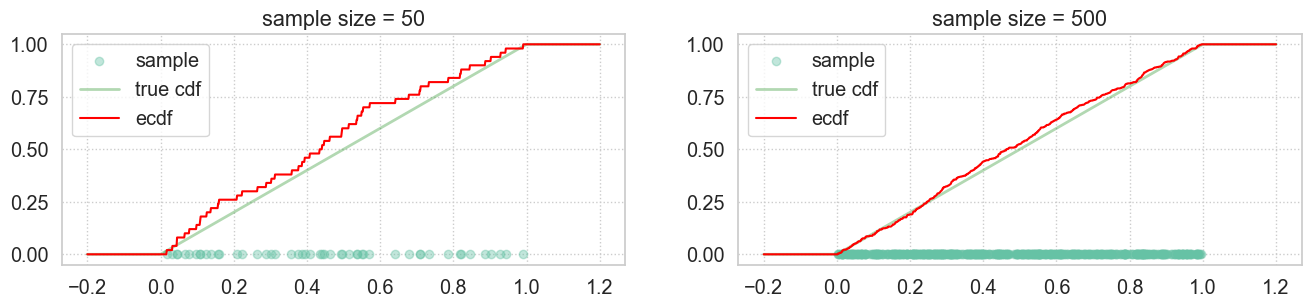

In [82]:
draw_ecdf(sample=sample, grid=grid, cdf=cdf)

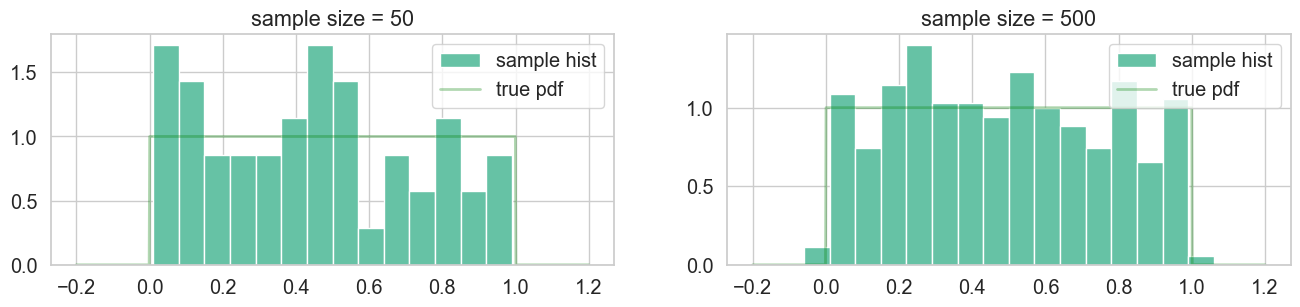

In [83]:
draw_hist(sample, grid, pdf)

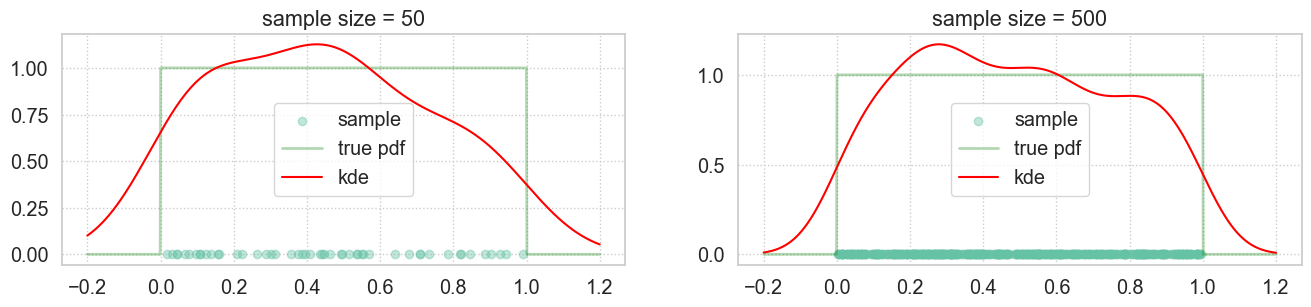

In [84]:
draw_pdf(sample, grid, pdf)

*2. Нормальное распределение $\mathcal{N}(0, 1)$.* Графики функции распределения и плотностей строить на интервале $(-3, 3)$.

In [85]:
n = 500
sample = sps.norm(loc=0, scale=1).rvs(size=n)
grid = np.linspace(-3, 3, 1000)
cdf = sps.norm(loc=0, scale=1).cdf
pdf = sps.norm(loc=0, scale=1).pdf

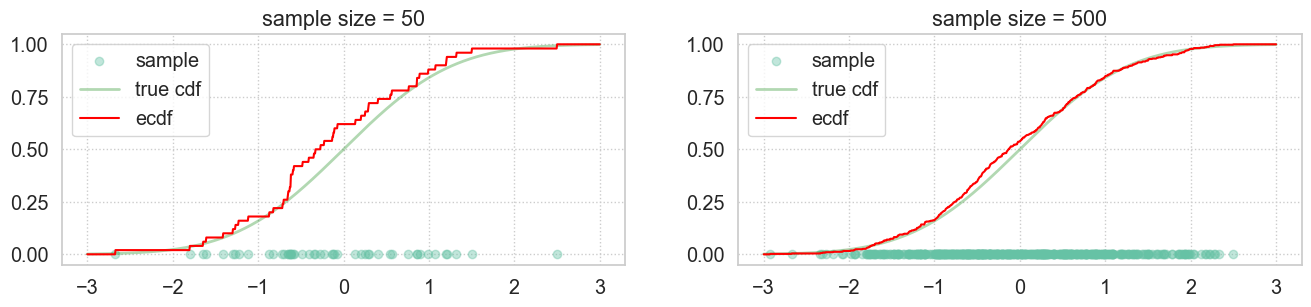

In [86]:
draw_ecdf(sample=sample, grid=grid, cdf=cdf)

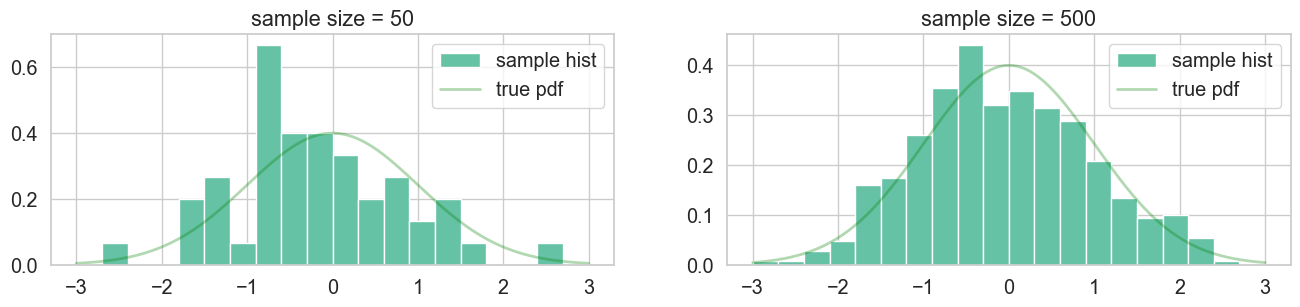

In [87]:
draw_hist(sample, grid, pdf)

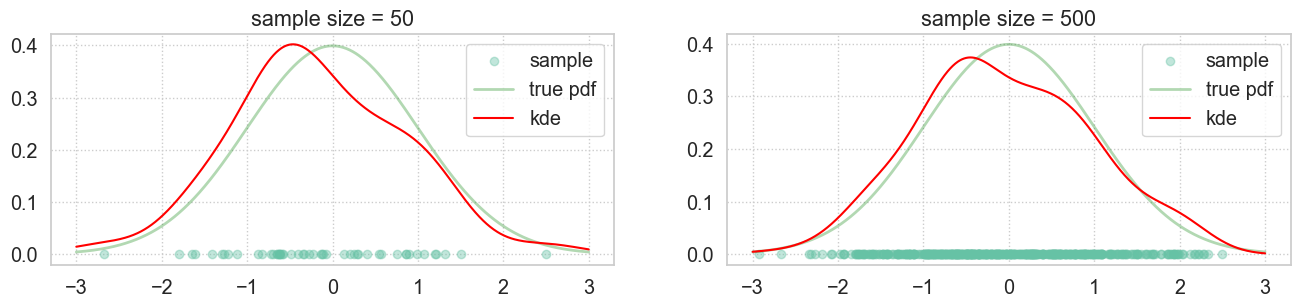

In [88]:
draw_pdf(sample, grid, pdf)

*3. Экспоненциальное распределение $Exp(1)$.* Графики функции распределения и плотностей  строить на интервале $(-0.5, 5)$.

In [89]:
n = 500
sample = sps.expon(scale=1).rvs(size=n)
grid = np.linspace(-0.5, 5, 1000)
cdf = sps.expon(scale=1).cdf
pdf = sps.expon(scale=1).pdf

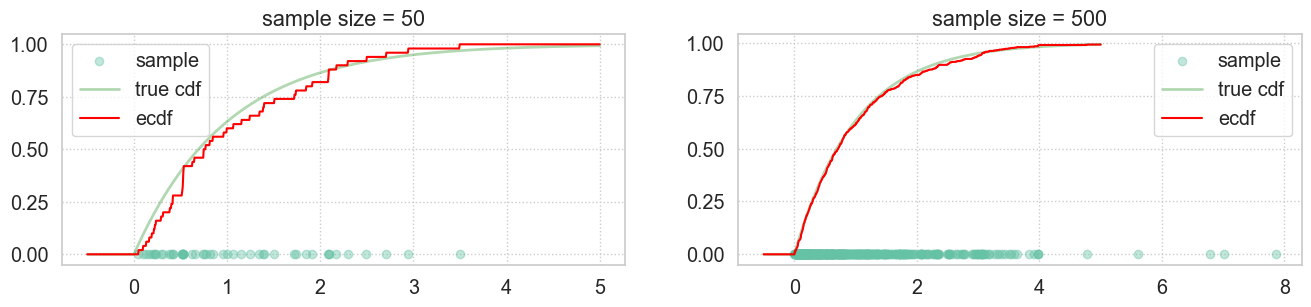

In [90]:
draw_ecdf(sample=sample, grid=grid, cdf=cdf)

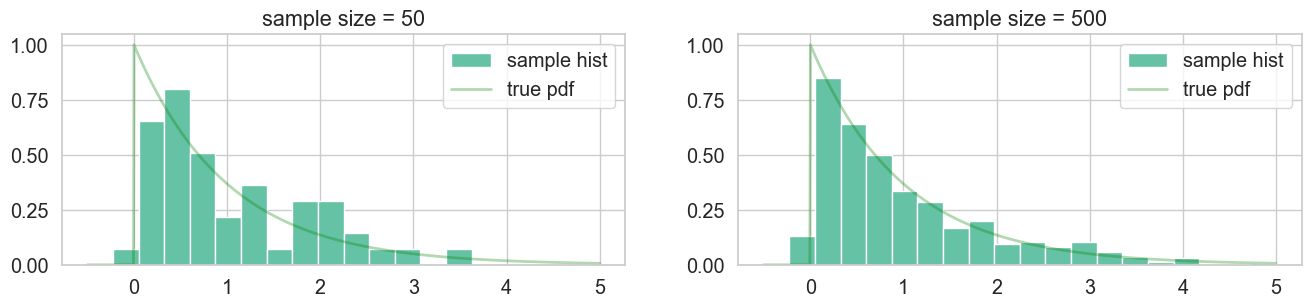

In [91]:
draw_hist(sample, grid, pdf)

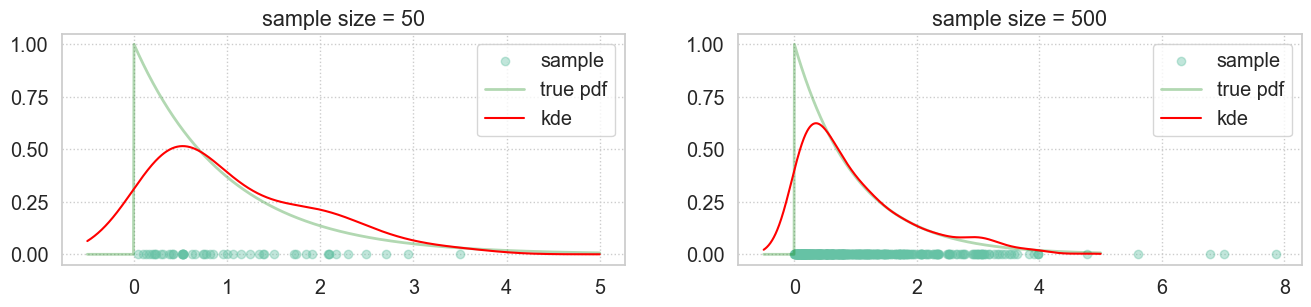

In [92]:
draw_pdf(sample, grid, pdf)

Опишите полученные результаты, сравните их между выборками из различных распределений.

**Вывод:**

Во всех случаях при увеличении размера выборки эмпирическая функция распределения достаточно хорошо приближает истинную функцию распределения. В случае нормального и экспоненциального распределения ядерная оценка плотности лучше приближает плотность распределения, чем в случае равномерного распределения, что и логично, так как мы строим оценку плотности по гауссовским ядрам.

---
### Задача 2.

Исследуйте вид ядерной оценки плотности в зависимости от вида ядра и его ширины.

Для этого сгенерируйте выборку $X_1, ..., X_{200}$ из распределения $U[0, 1]$ и постройте серию графиков для различной ширины гауссовского ядра, а затем другую серию графиков для различных типов ядер при фиксированной ширине. На каждом графике на отрезке $[-0.2, 1.2]$ должны быть изображены истинная плотность (полупрозрачным цветом) и ее ядерная оценка, а так же с нулевой $y$-координатой должны быть нанесены точки выборки. Для экономии места стройте графики в два столбца.

Вам выдется почти готовый код для выполнения задания с некоторыми пропусками. Код предполагает использование реализации ядерных оценок плотности из `statsmodels`. При желании вы можете написать аналогичный код, используя реализацию в `seaborn`. При построении KDE разрешается использовать цикл.

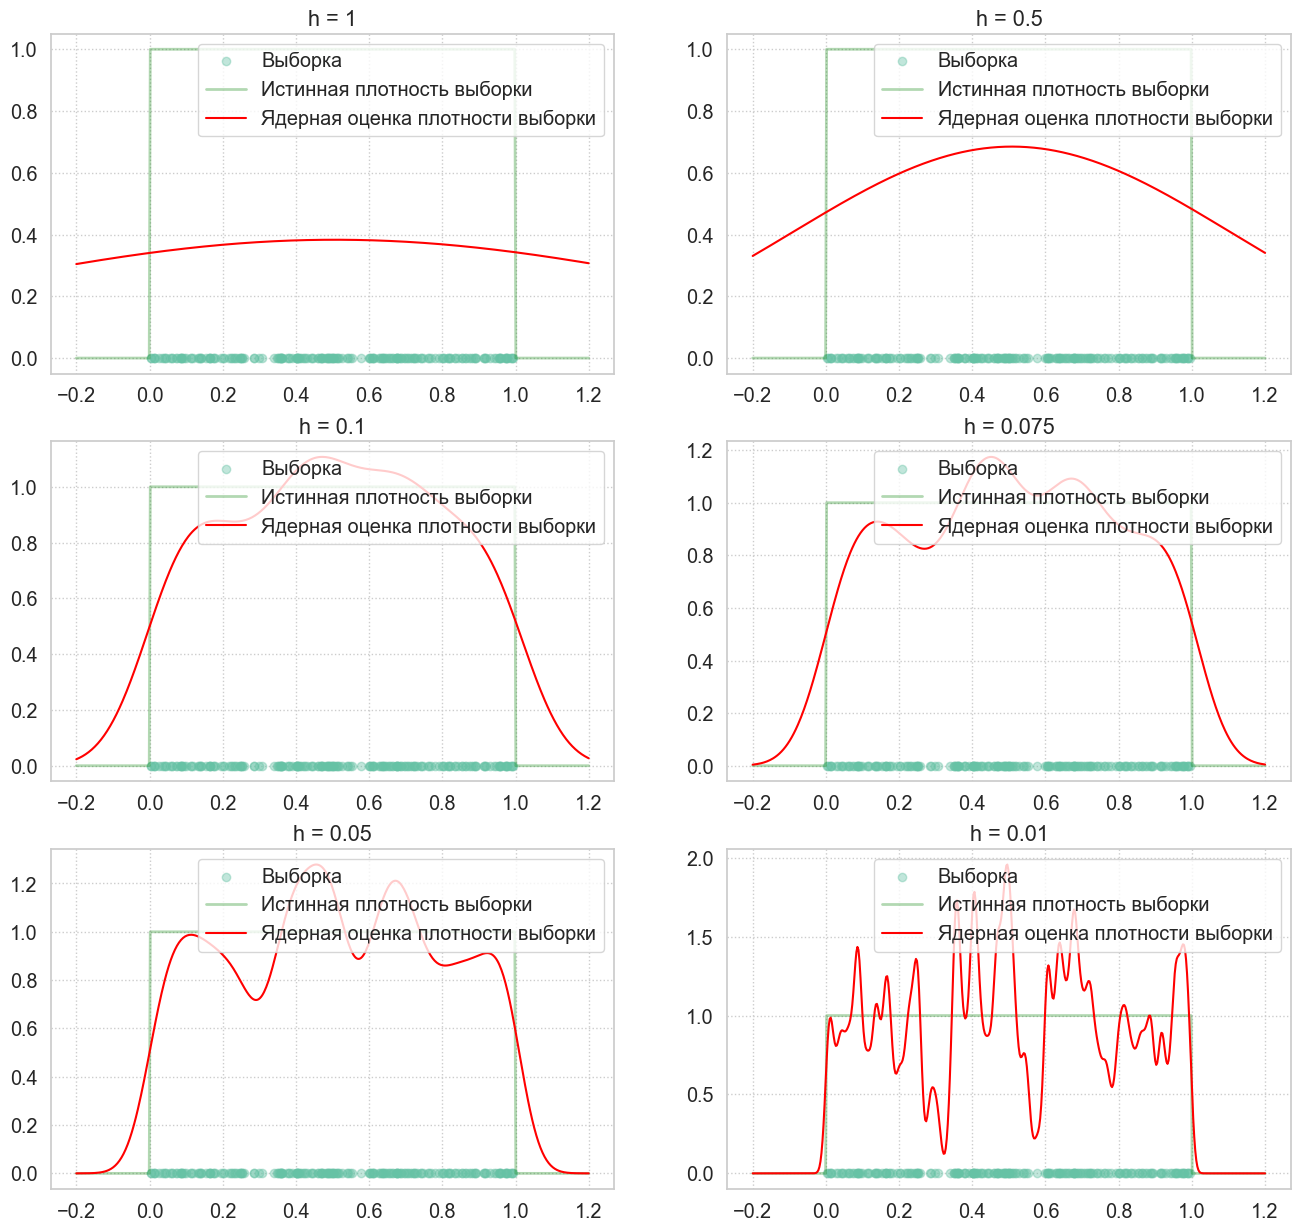

In [97]:
# Размер выборки
size = 200
# Выборка размера size
sample = sps.uniform(loc=0, scale=1).rvs(size=size)
# Сетка на отрезке из условия
grid = np.linspace(-0.2, 1.2, 500)

plt.figure(figsize=(16, 15))

# Итераций по ширине ядра
for i, bw in enumerate([1, 0.5, 0.1, 0.075, 0.05, 0.01]):
    plt.subplot(3, 2, i + 1)
    # Построение KDE
    kde = KDEUnivariate(sample)
    kde.fit(bw=bw)
    kernel_density = kde.density
    #<постройте ядерную оценку плотности по выборке sample
    #                  с шириной ядра bw>
    # Отображение элементов выборки
    plt.scatter(sample, np.zeros(size), alpha=0.4, label='Выборка')
    # Построение истинной плотности выборки
    plt.plot(grid, sps.uniform(loc=0, scale=1).pdf(grid), color='green', 
             alpha=0.3, lw=2, label='Истинная плотность выборки')
    # Отображение KDE плотности
    plt.plot(grid, kde.evaluate(grid), 
             color='red', label='Ядерная оценка плотности выборки')
    plt.legend(loc=1)
    plt.grid(ls=':')
    plt.title('h = {}'.format(bw))
plt.show()

Во втором случае графики постройте аналогичным образом, проведя итерации по типу ядра.

In [105]:
for i, ker_name in enumerate(kernel_switch.keys()):
    print(ker_name)

gau
epa
uni
tri
biw
triw
cos
cos2
tric


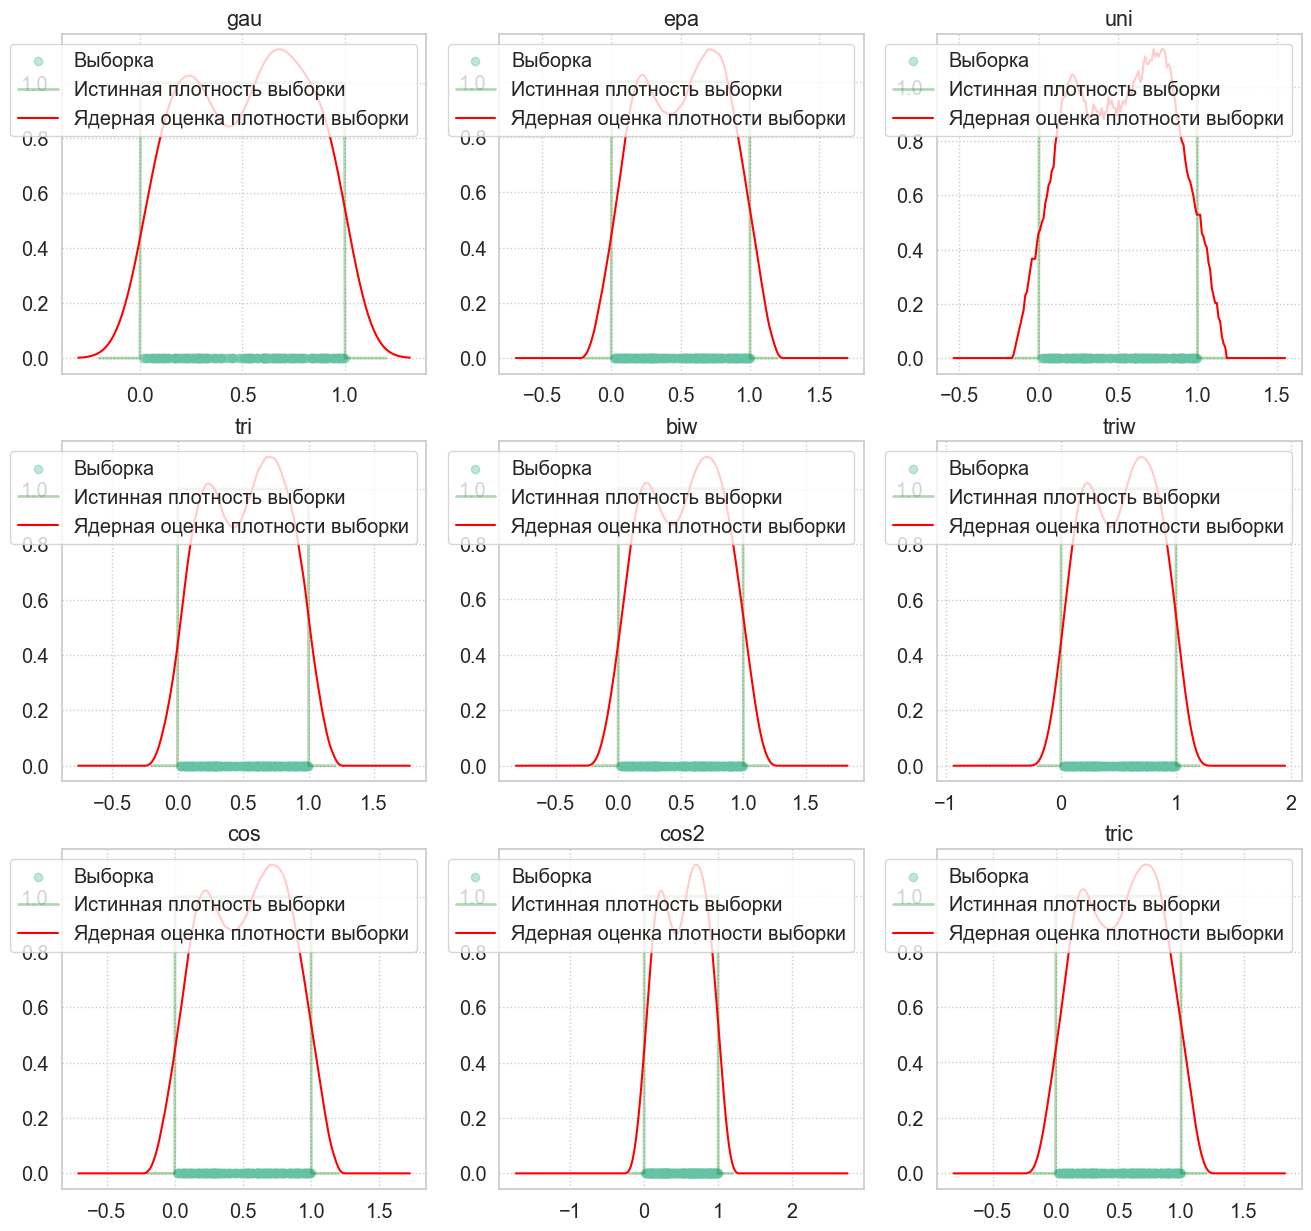

In [131]:
# Размер выборки
size = 200
# Выборка размера size
sample = sps.uniform(loc=0, scale=1).rvs(size=size)
# Сетка на отрезке из условия
grid = np.linspace(-0.2, 1.2, 500)

plt.figure(figsize=(16, 15))

# Итераций по ширине ядра
for i, kernel in enumerate(kernel_switch.keys()):
    plt.subplot(3, 3, i + 1)
    # Построение KDE
    kde = KDEUnivariate(sample)
    kde.fit(kernel=kernel, fft=False)
    kernel_density = kde.density
    #<постройте ядерную оценку плотности по выборке sample
    #                  с шириной ядра bw>
    # Отображение элементов выборки
    plt.scatter(sample, np.zeros(size), alpha=0.4, label='Выборка')
    # Построение истинной плотности выборки
    plt.plot(grid, sps.uniform(loc=0, scale=1).pdf(grid), color='green', 
             alpha=0.3, lw=2, label='Истинная плотность выборки')
    # Отображение KDE плотности
    plt.plot(kde.support, kde.density,
             color='red', label='Ядерная оценка плотности выборки')
    plt.legend(loc=1)
    plt.grid(ls=':')
    plt.title('{}'.format(kernel))
plt.show()

**Вывод:**

При исследовании зависимости ядерной оценки плотности от ширины ядра из графиков видно, что при больших и маленьких ширинах оценка плотности плохо приближает истинную плотность, но при средней ширине ядра: 0.01 и 0.075 - ядерная оценка плотности достаточно хорошо приближает действительную плотность. При зависимости от вида ядра все графики оценки плотности были достаточно похожи, но где-то хвосты были более тяжелыми. Но в целом все виды ядер почти одинаково и достаточно хорошо приближают плотность равномерного распределения.

---

## Корреляции, важность признаков

### Задача 3.

Вам выдается сводная статистика о посетителях сайта mipt-stats.gitlab.io и вики-страниц за период с февраля по май этого года. В каждой ячейке таблицы записано количество посетителей определенного условия, которые хотя бы раз посетили указанные выше ресурсы. Пол посетителя определяется технологией Яндекс.Метрики.

In [13]:
data = pd.DataFrame(
    {'Мужской': [7160, 3286, 224, 143, 1022, 826],
     'Женский': [3318, 1593, 69, 87, 328, 508]},
    index=['Chrome', 'Яндекс Браузер', 'Firefox', 
           'Safari', 'Opera', 'Edge']    
)
data

,Мужской,Женский
Chrome,7160,3318
Яндекс Браузер,3286,1593
Firefox,224,69
Safari,143,87
Opera,1022,328
Edge,826,508


Проверьте гипотезу о том, что тип используемого браузера не зависит от пола посетителя. Сделайте вывод.

---
### Задача 4.

Вспомним задачу из домашнего задания 3.2, в котором вы рассмотрели изображения образцов листьев и построили проекцию этих данных на несколько первых главных компонент. Посчитайте и визуализируйте матрицу коэффициентов корреляции Пирсона для полученных проекций. То есть в клетке с индексами $(i , j)$ должен быть коэффициент корреляции Пирсона между проекциями на $i$-ую и $j$-ую главные компоненты. Можете ли вы объяснить полученный эффект теоретически?

---
### Задача 5.

Скачайте <a href="http://archive.ics.uci.edu/ml/datasets/Bank+Marketing">данные</a> маркетинговых кампаний португальского банковского учреждения. Цель задачи &mdash; с целью дальнейшего исследования понять, какие условия (среди 20 признаков) влияют на подписание клиентом срочного депозита (величина $y$). Выполните задачу двумя способами:

* методами анализа зависимостей, выяснив, какие характеристики клиента оказывают влияние на целевую переменную, и указав степень влияния;
	
* вычислив важность признаков, полученной с помощью Random Forest, разбив предварительно данные на обучающую и тестовую части.
	
Проинтерпретируйте полученные результаты.
	
*Напоминание*: в случае отбора признаков с целью дальнейшего исследования можно применять методы, контролирующие FDR на уровне не более 0.1.

In [172]:
data = pd.read_csv('bank/bank.csv', sep=';')

In [173]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [174]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

Закодируем таргет с помощью LabelEncoding.

In [175]:
encoder = LabelEncoder()
for feature in ['y']:
    data[feature] = encoder.fit_transform(data[feature])

Категориальные признаки закодируем с помощью MeanEncoding.

In [176]:
cat_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
encoder_mean = TargetEncoder(cols=cat_features)
data = encoder_mean.fit_transform(data, data['y'])

Посчитаем корреляции Спирмена и отобразим их на гистограмме.

In [178]:
correlations = data.corr(method='spearman')['y'].iloc[:-1].sort_values()
correlations

campaign    -0.064612
day         -0.011811
default      0.001303
age          0.016271
education    0.055294
marital      0.064292
loan         0.070517
balance      0.078982
housing      0.104683
job          0.108213
contact      0.130933
pdays        0.150179
previous     0.165333
month        0.170548
poutcome     0.181121
duration     0.348439
Name: y, dtype: float64

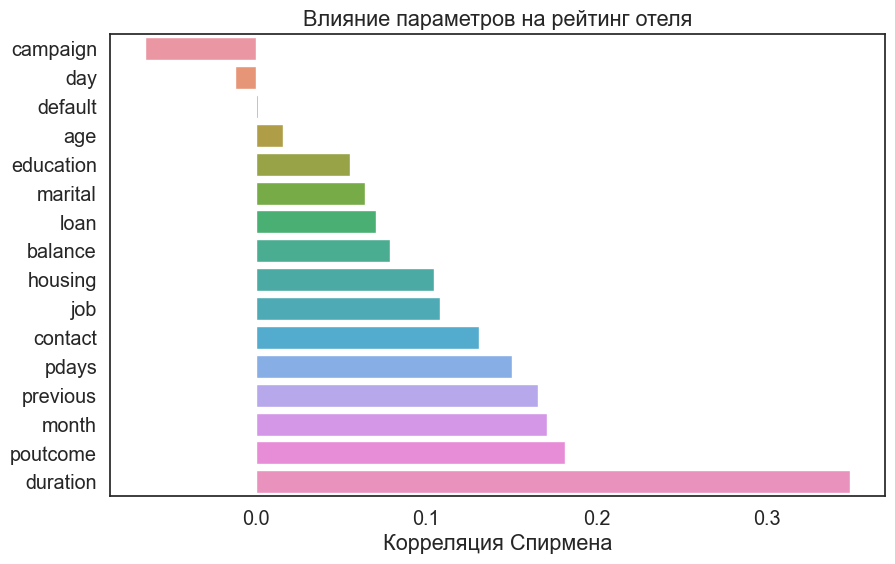

In [198]:
sns.set(font_scale=1.3, style='white', palette='Set2')
plt.figure(figsize=(10, 6))
sns.barplot(y=correlations.index, x=correlations)
plt.title('Влияние параметров на рейтинг отеля')
plt.xlabel('Корреляция Спирмена');

Как было сказано в задании разделим выборку и посчитаем важность признаков с помощью RandomForest.

In [181]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :-1], data.iloc[:, -1], test_size=0.25, random_state=25)

In [186]:
rf = RandomForestClassifier(n_estimators=500)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

In [191]:
features_importances = pd.Series(
    rf.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

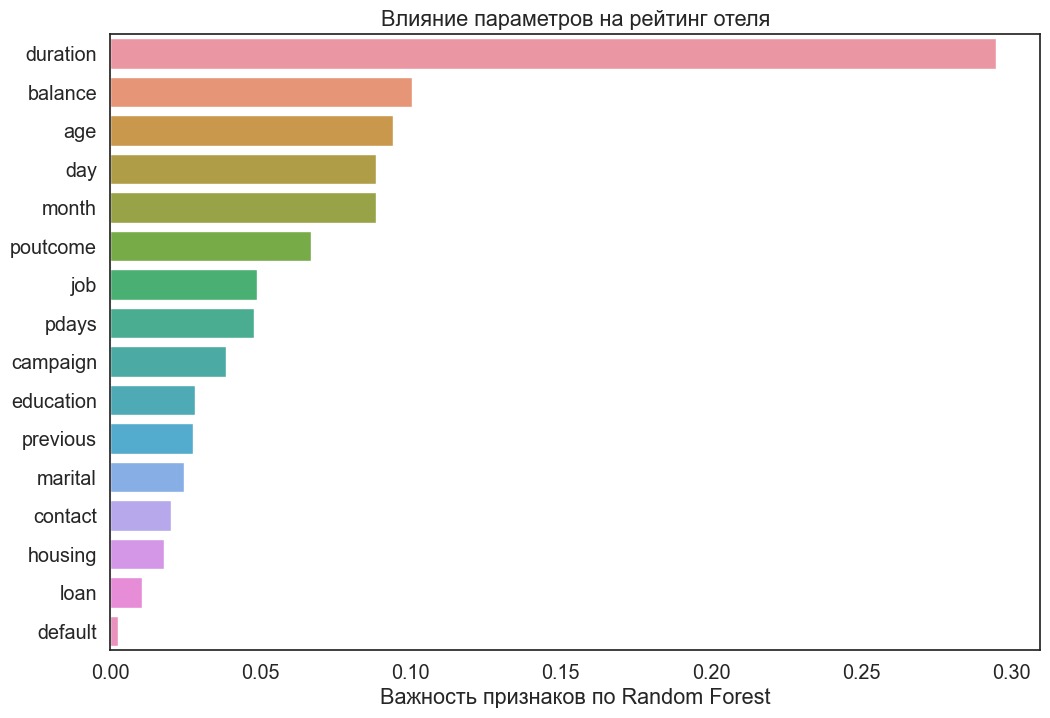

In [195]:
sns.set(font_scale=1.3, style='white', palette='Set2')
plt.figure(figsize=(12, 8))
sns.barplot(y=features_importances.index, x=features_importances)
plt.title('Влияние параметров на рейтинг отеля')
plt.xlabel('Важность признаков по Random Forest');

**Вывод:**

При анализе зависимостей двумя разными подходами видно, что оба из них показывают, что больше всего на подписание клиентом срочного депозита влияет признак 'duration'. А наименее всего влияет признак 'default'. Также RandomForestпоказывает, что 'day' и 'age' - признаки не самой последней важности, однако коэффициент корреляции Спирмена показывает, что данные признаки не влияют на таргет.

---
### Задача 6.

Рассмотрим задачу регрессии. Мы уже научились оценивать зависимость $y(x)$, но это только точечная оценка для каждого конкретного $x$. На практике бывает необходимо строить доверительные интервалы, которые в совокупности образуют доверительные ленты. Поскольку мы ничего не знаем про распределение ошибок, будем строить доверительную ленту по методу бутстрепа.

1. Сгенерируем достаточно большое число бутстрепных выборок.

2. Обучим модели и получим значения $\widehat{y}(x)$, для всех значений $x$ по сетке значений.

3. По предсказаным значениям оценим верхнюю и нижнюю границы ленты с помощью методов построения бутстрепных доверительных интервалов.

Напишите функцию, которая реализует данный метод

In [ ]:
def bootstrap_confidence_interval(X, Y, model, X_grid, 
                                  bootstrap_count=<...>, alpha=0.95, model_args=None):
    '''
    Построение предсказательной ленты для модели регрессии.
    
    X, Y - выборка;
    model - класс модели;
    X_grid - сетка для доверительной ленты;
    alpha - уровень доверия;
    bootstrap_count - количество бутстрепных выборок
    model_args - параметры модели.
    '''
    
    predictions = []

    for _ in tqdm(np.arange(bootstap_count)):
        bootstap_model = model(model_args)
        <...>
        predictions.append(bootstrap_model.predict(<...>))

    lower_bound = <...>
    upper_bound = <...>
    return lower_bound, upper_bound

Рассмотрим датасет cps71 из семинара

In [ ]:
data = pd.read_csv('cps71.csv', index_col=0)
data.head()

Разделим нашу выборку на обучающую и тестовую

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

Постройте доверительные ленты для моделей линейной регрессии, ядерной регрессии и KNN-регрессии.
Изобразите на графике также предсказания каждой модели и обучающую выборку.

*Примечание: для классов из statmodels сигнатура класса может не совпадать со стандартной, поэтому сделайте для этих классов, класс-обертку, который в себе просто будет вызывать нужные методы.*

Сделайте выводы

**Вывод:**

<...>